## **Анализ датасетов (вшэ-общительные)**

## **Импорт библиотек и датасетов**

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt


URL_BASE = 'https://media.githubusercontent.com/media/yyaroslavskiy/BI/refs/heads/main/'

def read_database0(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name), index_col=0)

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

def read_database2(file_name, sprt):
    return pd.read_csv(os.path.join(URL_BASE, file_name), sep=sprt)

## **Датасет ВК**

In [ ]:
df = read_database('case_dataset.csv')
df.head()

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
0,0,1,34,2,53,android,"['web2', 'android', 'mvk', 'android_messenger'...",18,13240.403333,17,...,16,2062.786875,0,NaN,0.0,1.8209,14.099880,{},15,"['18+','Знакомства','Неоригинальный тематическ..."
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0,NaN,0.0,0.0000,0.000000,{},0,"['Мода','Неоригинальный тематический контент',..."
2,2,1,15,2,61,web2,"['web2', 'android']",30,1096.586000,25,...,30,951.446000,0,NaN,0.0,0.0000,0.371308,{},6,"['Некачественный контент','Неоригинальный конт..."
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0,NaN,0.0,0.0000,0.098684,{},12,[]
4,4,1,25,2,65,mvk,"['web2', 'mvk']",7,276.398571,4,...,3,68.880000,0,NaN,0.0,0.0000,0.115412,{},22,"['Музыка','Неоригинальный тематический контент..."


In [ ]:
print(df.shape)
print(df.dtypes)

(1020898, 25)
Unnamed: 0                 int64
country_id                 int64
age                        int64
sex                        int64
friends                    int64
heavy_vk_platform         object
vk_platforms_array        object
days_in_vk                 int64
avg_daily_ts             float64
days_in_feed               int64
avg_daily_ts_feed        float64
days_in_clips              int64
avg_daily_ts_clips       float64
days_in_video              int64
avg_daily_ts_video       float64
days_in_messages           int64
avg_daily_ts_messages    float64
days_in_games              int64
avg_daily_ts_games       float64
games_revenue_in_app     float64
games_revenue_ads        float64
total_revenue_vk         float64
games                     object
final_cluster              int64
interest_array            object
dtype: object


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
corr_cols=['country_id', 'age', 'sex', 'friends', 'days_in_vk', 'avg_daily_ts',
           'days_in_feed', 'avg_daily_ts_feed', 'days_in_clips', 'avg_daily_ts_clips',
           'days_in_video', 'avg_daily_ts_video', 'days_in_messages', 'avg_daily_ts_messages',
           'days_in_games', 'avg_daily_ts_games', 'games_revenue_in_app', 'games_revenue_ads',
           'total_revenue_vk', 'final_cluster']
corr=df_numeric[corr_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,country_id,age,sex,friends,days_in_vk,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,avg_daily_ts_clips,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,final_cluster
country_id,1.000000,-0.049207,0.101943,-0.042417,-0.184590,-0.095058,-0.159907,-0.118271,-0.151639,-0.064889,-0.040883,-0.017375,-0.198340,-0.046608,-0.020778,0.004242,-0.002379,-0.011854,-0.055707,-0.279192
age,-0.049207,1.000000,-0.078107,0.010368,-0.000421,0.011121,0.001380,0.140654,0.040795,0.005068,0.004715,-0.030540,-0.088004,-0.078467,0.034821,0.171330,0.003804,0.020063,0.018009,-0.011114
sex,0.101943,-0.078107,1.000000,-0.024286,-0.084238,0.002409,-0.070366,-0.070101,-0.028662,0.090232,0.086134,0.027216,-0.096697,-0.011063,-0.022943,-0.082359,-0.000402,-0.021239,-0.028174,-0.086416
friends,-0.042417,0.010368,-0.024286,1.000000,0.161528,0.122926,0.167672,0.088860,0.144501,0.011834,0.121262,0.001040,0.190282,0.099484,0.025038,0.023502,0.004153,0.009550,0.074202,0.117650
days_in_vk,-0.184590,-0.000421,-0.084238,0.161528,1.000000,0.443802,0.909044,0.430284,0.638513,0.130684,0.620231,0.082821,0.789110,0.195244,0.104620,0.064802,0.011538,0.041396,0.206066,0.325981
avg_daily_ts,-0.095058,0.011121,0.002409,0.122926,0.443802,1.000000,0.463728,0.589013,0.587664,0.382483,0.640590,0.599628,0.465020,0.477619,0.198934,0.397776,0.035920,0.111608,0.238885,0.216160
days_in_feed,-0.159907,0.001380,-0.070366,0.167672,0.909044,0.463728,1.000000,0.484947,0.717631,0.143379,0.630987,0.024629,0.763591,0.194318,0.099792,-0.030363,0.008683,0.039529,0.225493,0.354730
avg_daily_ts_feed,-0.118271,0.140654,-0.070101,0.088860,0.430284,0.589013,0.484947,1.000000,0.629830,0.132129,0.470203,0.036129,0.444678,0.157266,0.079849,0.050868,0.004650,0.043542,0.261232,0.087712
days_in_clips,-0.151639,0.040795,-0.028662,0.144501,0.638513,0.587664,0.717631,0.629830,1.000000,0.431266,0.697036,0.049977,0.671282,0.235847,0.066978,-0.099565,0.003310,0.032414,0.264626,0.280391
avg_daily_ts_clips,-0.064889,0.005068,0.090232,0.011834,0.130684,0.382483,0.143379,0.132129,0.431266,1.000000,0.245789,0.095242,0.132945,0.053362,0.011713,-0.015894,0.000351,0.005840,0.104054,0.130563


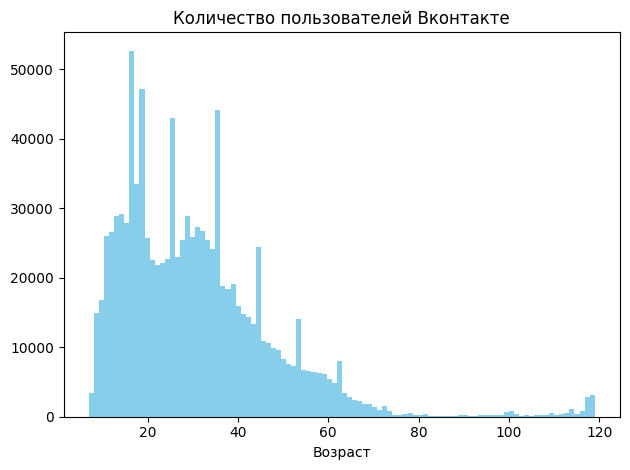

In [ ]:
plt.hist(df.age, bins=100, color='skyblue')
plt.title('Количество пользователей Вконтакте')
plt.xlabel('Возраст')
plt.show()

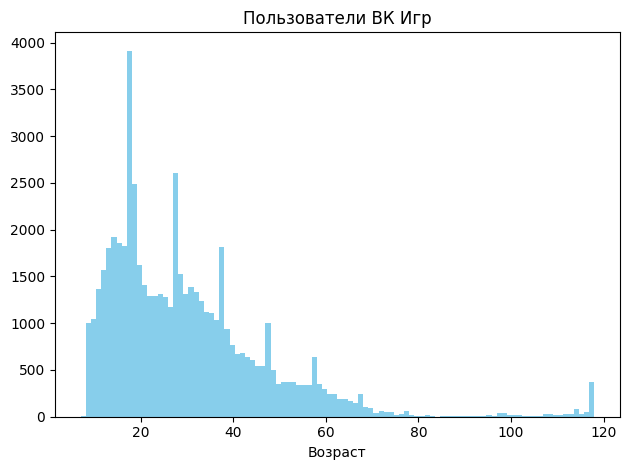

In [ ]:
plt.hist(df[df['days_in_games'] > 0].age, bins=100, color='skyblue')
plt.title('Пользователи ВК Игр')
plt.xlabel('Возраст')
plt.show()

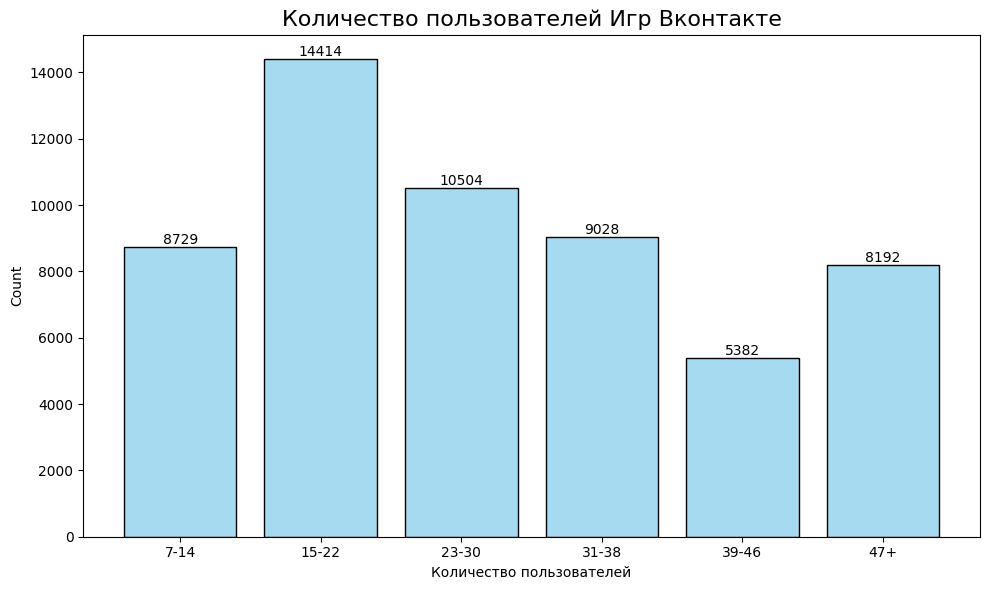

In [ ]:
bins = [7, 14, 22, 30, 38, 46, float('inf')]
labels = ['7-14', '15-22', '23-30', '31-38', '39-46', '47+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


plt.figure(figsize=(10, 6))
vku=sns.histplot(df[df['days_in_games'] > 0], x='age_group', discrete=True, shrink=0.8, color="skyblue")

for p in vku.patches:
    height = p.get_height()
    vku.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.rcParams["figure.autolayout"] = True
plt.title('Количество пользователей Игр Вконтакте', fontsize=16)
plt.xlabel('Возрастная группа')
plt.xlabel('Количество пользователей')
plt.show()

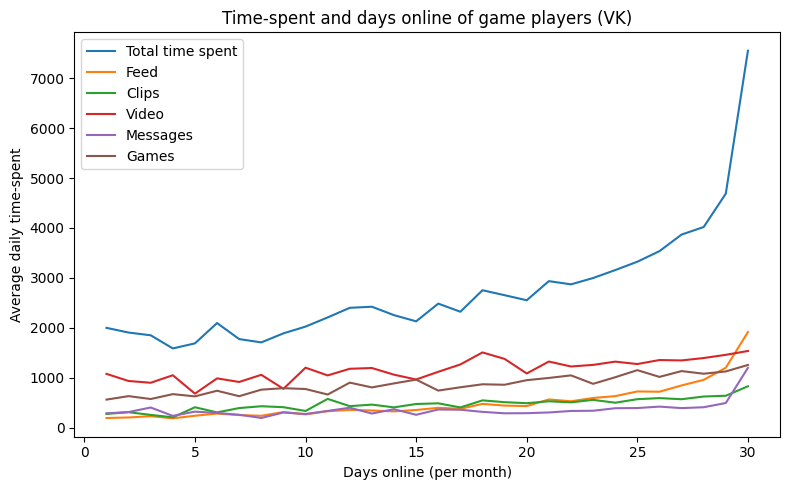

In [ ]:
dfg=df[df['days_in_games'] > 0].groupby(by='days_in_vk')[['avg_daily_ts', 'avg_daily_ts_feed', 'avg_daily_ts_clips', 'avg_daily_ts_video','avg_daily_ts_messages', 'avg_daily_ts_games', 'total_revenue_vk']].agg('mean')

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(dfg.index, dfg.avg_daily_ts, label="Total time spent")
plt.plot(dfg.index, dfg.avg_daily_ts_feed, label="Feed")
plt.plot(dfg.index, dfg.avg_daily_ts_clips, label="Clips")
plt.plot(dfg.index, dfg.avg_daily_ts_video, label="Video")
plt.plot(dfg.index, dfg.avg_daily_ts_messages, label="Messages")
plt.plot(dfg.index, dfg.avg_daily_ts_games, label="Games")



plt.xlabel("Days online (per month)")
plt.ylabel("Average daily time-spent")
plt.title("Time-spent and days online of game players (VK)")
plt.legend()
plt.show()

In [ ]:
selection = alt.selection_interval()
chart1 = alt.Chart(df[(df['total_revenue_vk'] < 120)&(df['days_in_games'] > 0)].head(5000)).mark_point(size=50).encode(
    x='avg_daily_ts',
    y='total_revenue_vk',
    color='sex'
).add_selection(
  selection
).properties(
    title='Дневной time-spent и общая выручка VK от пользователя ВК Игр'
)

chart2 = alt.Chart(df[df['total_revenue_vk'] < 120].head(5000)).mark_bar().encode(
  alt.X('age'),
  alt.Y('count()')
).transform_filter(
  selection
).properties(
    title='Гистограмма по возрастам'
).interactive()

chart1|chart2

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'country_id', 'age', 'sex', 'friends',
       'heavy_vk_platform', 'vk_platforms_array', 'days_in_vk', 'avg_daily_ts',
       'days_in_feed', 'avg_daily_ts_feed', 'days_in_clips',
       'avg_daily_ts_clips', 'days_in_video', 'avg_daily_ts_video',
       'days_in_messages', 'avg_daily_ts_messages', 'days_in_games',
       'avg_daily_ts_games', 'games_revenue_in_app', 'games_revenue_ads',
       'total_revenue_vk', 'games', 'final_cluster', 'interest_array',
       'age_group'],
      dtype='object')


<ipython-input-63-567e4c2f4394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  aud=sns.countplot(data=df[df['days_in_games'] > 0], x='heavy_vk_platform', order=df['heavy_vk_platform'].value_counts().index, palette="viridis")


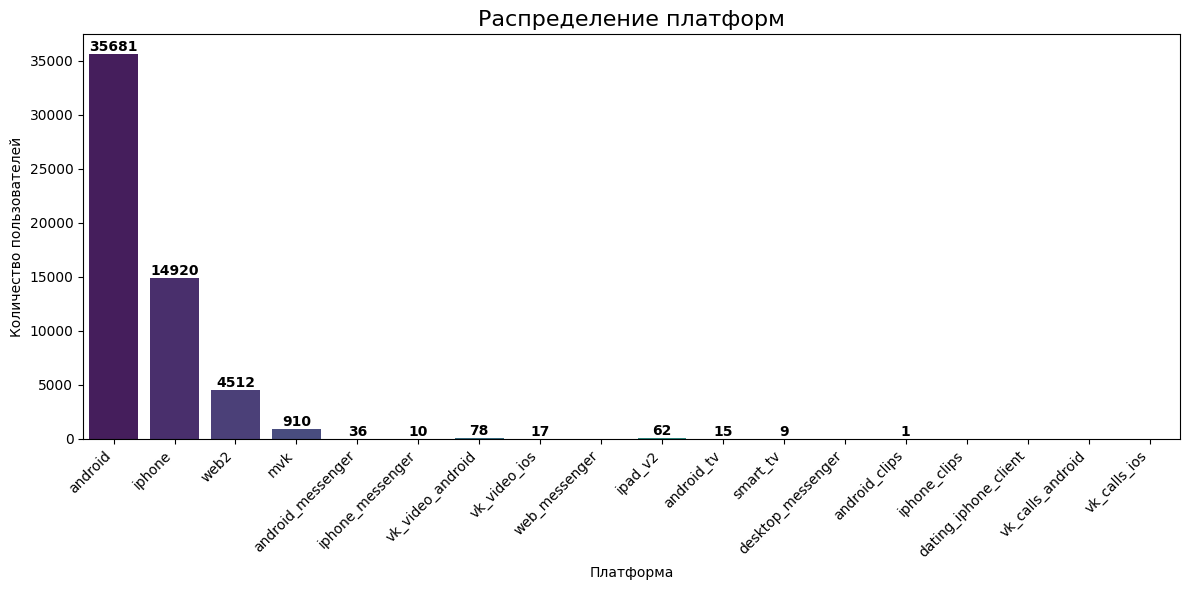

In [ ]:
plt.figure(figsize=(12, 6))
aud=sns.countplot(data=df[df['days_in_games'] > 0], x='heavy_vk_platform', order=df['heavy_vk_platform'].value_counts().index, palette="viridis")

for p in aud.patches:
    height = p.get_height()
    aud.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')

plt.title('Распределение платформ', fontsize=16)
plt.xlabel('Платформа')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45, ha='right')
plt.show()

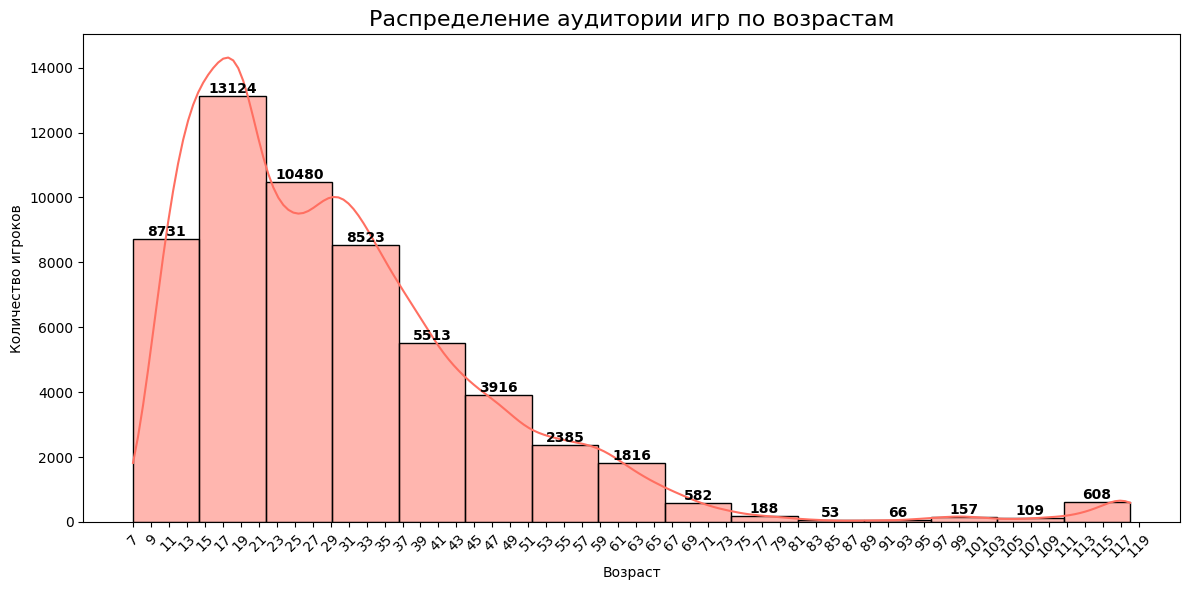

In [ ]:
plt.figure(figsize=(12, 6))
dfn=df[df['days_in_games'] > 0]
ras=sns.histplot(dfn, x='age', bins=15, kde=True, color="#ff6f61")

for p in ras.patches:
    height = p.get_height()
    ras.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')

plt.title('Распределение аудитории игр по возрастам', fontsize=16)
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.xticks(range(int(df['age'].min()), int(df['age'].max()) + 1, 2), rotation=45)  # Добавление меток через каждые 2 года
plt.show()

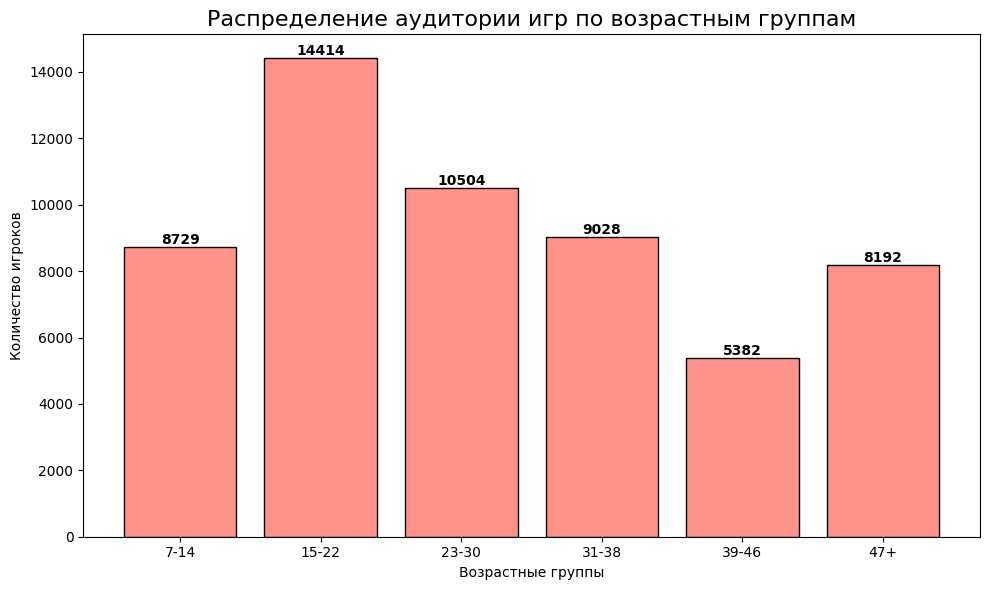

In [ ]:
plt.figure(figsize=(10, 6))
gr=sns.histplot(df[df['days_in_games'] > 0], x='age_group', discrete=True, shrink=0.8, color="#ff6f61")

for p in gr.patches:
    height = p.get_height()
    gr.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')

plt.xlabel('Возрастные группы')
plt.ylabel('Количество игроков')
plt.title('Распределение аудитории игр по возрастным группам', fontsize=16)
plt.show()

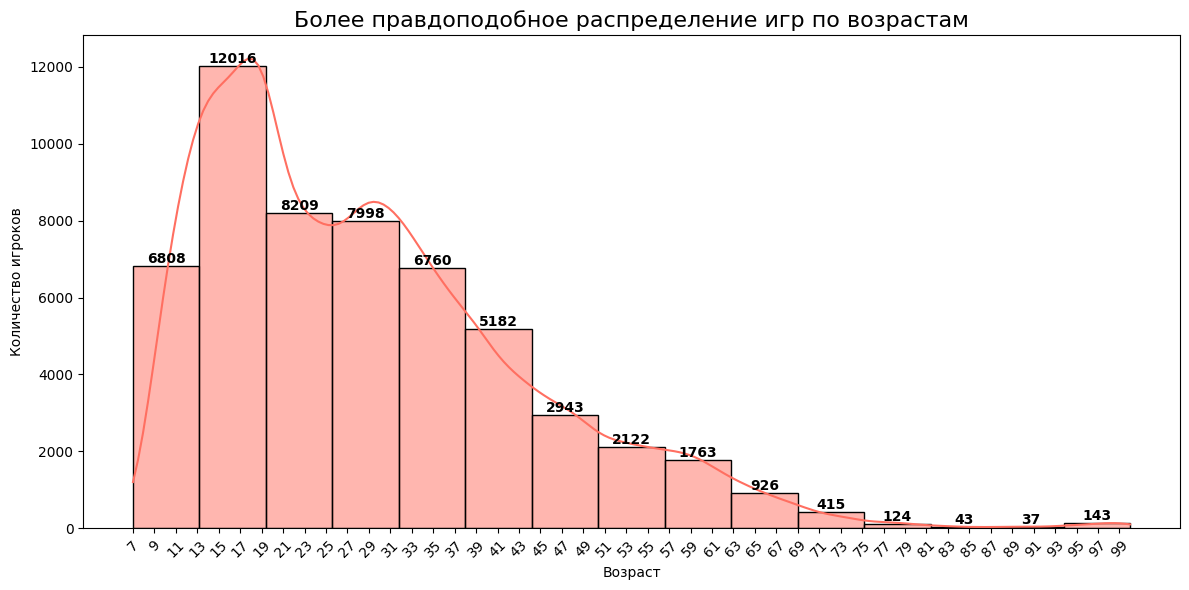

In [ ]:
age_filtered_df = df[(df['days_in_games'] > 0) & (df['age'] <= 100)]

plt.figure(figsize=(12, 6))
trp=sns.histplot(age_filtered_df, x='age', bins=15, kde=True, color="#ff6f61")

for p in trp.patches:
    height = p.get_height()
    trp.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black', fontweight='bold')

plt.title('Более правдоподобное распределение игр по возрастам', fontsize=16)
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.xticks(range(int(age_filtered_df['age'].min()), 101, 2), rotation=45)
plt.show()

In [ ]:
df['monet_not_ad'] = df['games_revenue_in_app']
df['monet_ad'] = df['games_revenue_ads']

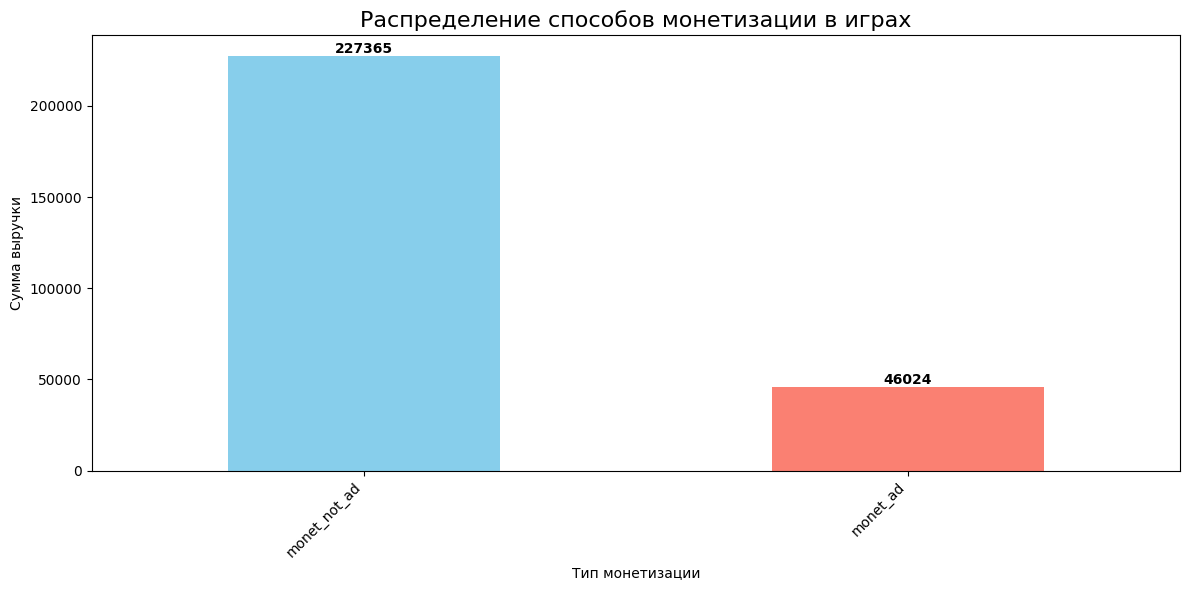

In [ ]:
plt.figure(figsize=(12, 6))
dfn2=df[df['days_in_games'] > 0]
gr2=dfn2[['monet_not_ad', 'monet_ad']].sum().plot(kind='bar', color=['skyblue', 'salmon'])

for p in gr2.patches:
    gr2.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom',
                 fontsize=10, color='black', fontweight='bold')

plt.title('Распределение способов монетизации в играх', fontsize=16)
plt.xlabel('Тип монетизации')
plt.ylabel('Сумма выручки')
plt.xticks(rotation=45, ha='right')
plt.show()

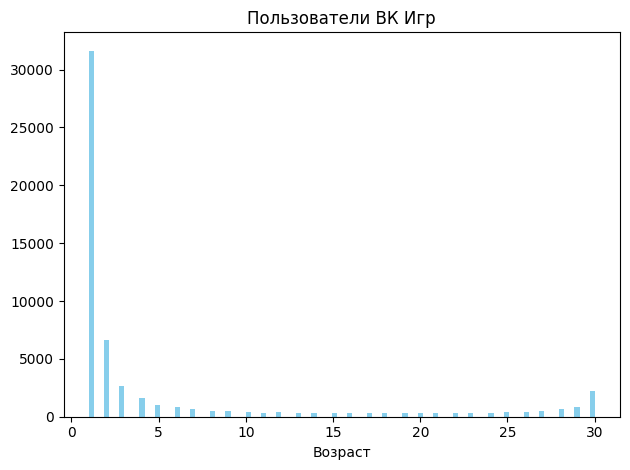

In [ ]:
hg=plt.hist(df[df['days_in_games'] > 0].days_in_games, bins=100, color='skyblue')
plt.title('Пользователи ВК Игр')
plt.xlabel('Возраст')

plt.show()

In [ ]:
df[df['days_in_games'] > 0]

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array,age_group,monet_not_ad,monet_ad
56,59,1,35,1,117,android,['android'],25,6405.643200,24,...,3232.150588,0.0,2.877170,5.781640,"{89297753:17,149184946:8}",16,"['Непрофессиональный юмор','Неоригинальный тем...",31-38,0.0,2.877170
68,72,4,30,1,19,iphone,"['mvk', 'iphone']",30,1788.051000,29,...,44.280000,0.0,0.004756,0.434721,{},0,"['Неоригинальный тематический контент','Новост...",23-30,0.0,0.004756
94,100,1,14,1,743,iphone,"['iphone', 'ipad_v2', 'web2', 'android_tv']",30,2987.506000,29,...,1.230000,0.0,0.000000,4.638576,{},23,"['Спорт','Путешествия','Услуги','Неоригинальны...",7-14,0.0,0.000000
117,127,1,33,1,702,android,['android'],30,6817.316000,30,...,634.680000,0.0,0.000000,10.804633,{},19,"['Сообщество про конкретный регион','Новости',...",31-38,0.0,0.000000
134,144,1,22,1,117,android,"['web2', 'mvk', 'android', 'android_messenger']",29,2008.208276,28,...,658.050000,0.0,0.000000,75.071399,{51882825:1},22,"['Реклама','Бизнес','Юмор','Оригинальный конте...",15-22,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020826,1084460,1,37,2,15,web2,['web2'],23,1927.570435,19,...,39.360000,0.0,0.000000,1.041931,{},1,[],31-38,0.0,0.000000
1020838,1084472,1,39,1,74,android,"['mvk', 'android']",30,4608.154000,30,...,607.620000,0.0,2.217123,37.561102,{104046779:12},16,"['Услуги','Сообщество про конкретный регион','...",39-46,0.0,2.217123
1020865,1084500,1,22,2,0,iphone,"['mvk', 'iphone']",8,2485.061250,8,...,429.885000,0.0,0.007755,0.007755,{1186431264:1},9,[],15-22,0.0,0.007755
1020866,1084501,1,32,2,331,iphone,"['web2', 'mvk', 'iphone']",30,4779.165000,30,...,14.913750,0.0,0.000000,9.790745,{},8,"['Спорт','Сообщество про конкретный регион','Н...",31-38,0.0,0.000000


In [ ]:
print('Средний месячный time spent - ', dfn.avg_daily_ts_games.agg('mean')*30/3600, ' часов')

Средний месячный time spent -  9.371385135689266  часов


In [ ]:
dfn

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array,age_group
56,59,1,35,1,117,android,['android'],25,6405.643200,24,...,32.703529,17,3232.150588,0.0,2.877170,5.781640,"{89297753:17,149184946:8}",16,"['Непрофессиональный юмор','Неоригинальный тем...",31-38
68,72,4,30,1,19,iphone,"['mvk', 'iphone']",30,1788.051000,29,...,104.911765,1,44.280000,0.0,0.004756,0.434721,{},0,"['Неоригинальный тематический контент','Новост...",23-30
94,100,1,14,1,743,iphone,"['iphone', 'ipad_v2', 'web2', 'android_tv']",30,2987.506000,29,...,323.398889,1,1.230000,0.0,0.000000,4.638576,{},23,"['Спорт','Путешествия','Услуги','Неоригинальны...",7-14
117,127,1,33,1,702,android,['android'],30,6817.316000,30,...,63.121364,1,634.680000,0.0,0.000000,10.804633,{},19,"['Сообщество про конкретный регион','Новости',...",31-38
134,144,1,22,1,117,android,"['web2', 'mvk', 'android', 'android_messenger']",29,2008.208276,28,...,781.884643,1,658.050000,0.0,0.000000,75.071399,{51882825:1},22,"['Реклама','Бизнес','Юмор','Оригинальный конте...",15-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020826,1084460,1,37,2,15,web2,['web2'],23,1927.570435,19,...,415.125000,2,39.360000,0.0,0.000000,1.041931,{},1,[],31-38
1020838,1084472,1,39,1,74,android,"['mvk', 'android']",30,4608.154000,30,...,208.162857,12,607.620000,0.0,2.217123,37.561102,{104046779:12},16,"['Услуги','Сообщество про конкретный регион','...",39-46
1020865,1084500,1,22,2,0,iphone,"['mvk', 'iphone']",8,2485.061250,8,...,30.135000,2,429.885000,0.0,0.007755,0.007755,{1186431264:1},9,[],15-22
1020866,1084501,1,32,2,331,iphone,"['web2', 'mvk', 'iphone']",30,4779.165000,30,...,12.761250,8,14.913750,0.0,0.000000,9.790745,{},8,"['Спорт','Сообщество про конкретный регион','Н...",31-38


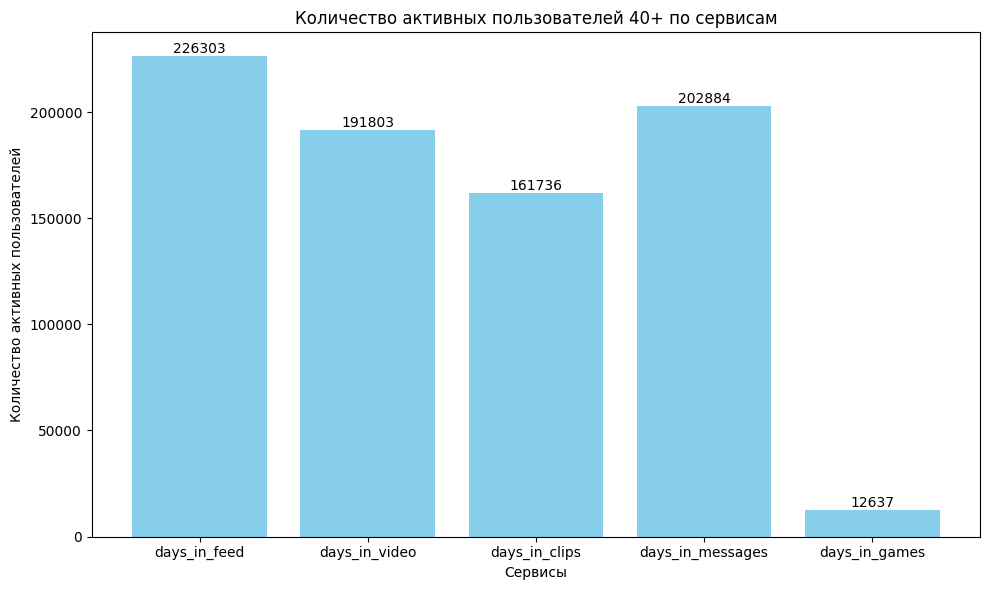

In [ ]:
dfag=df[df['age'] > 39]
services = ['days_in_feed', 'days_in_video', 'days_in_clips', 'days_in_messages', 'days_in_games']
active_users_count = {service: (dfag[service] > 0).sum() for service in services}
plt.figure(figsize=(10, 6))
dfaggr=plt.bar(active_users_count.keys(), active_users_count.values(), color='skyblue')

for bar in dfaggr:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel('Сервисы')
plt.ylabel('Количество активных пользователей')
plt.title('Количество активных пользователей 40+ по сервисам')
plt.show()

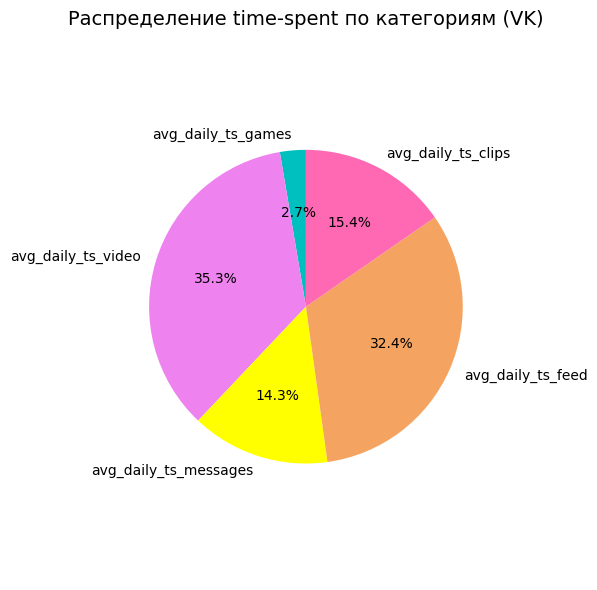

In [ ]:
daily_ts_columns = ['avg_daily_ts_games', 'avg_daily_ts_video', 'avg_daily_ts_messages', 'avg_daily_ts_feed', 'avg_daily_ts_clips']
daily_ts_sums = df[daily_ts_columns].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    daily_ts_sums,
    labels=daily_ts_sums.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['c', 'violet', 'yellow', 'sandybrown', 'hotpink']
)
plt.title('Распределение time-spent по категориям (VK)', fontsize=14)
plt.axis('equal')
plt.show()

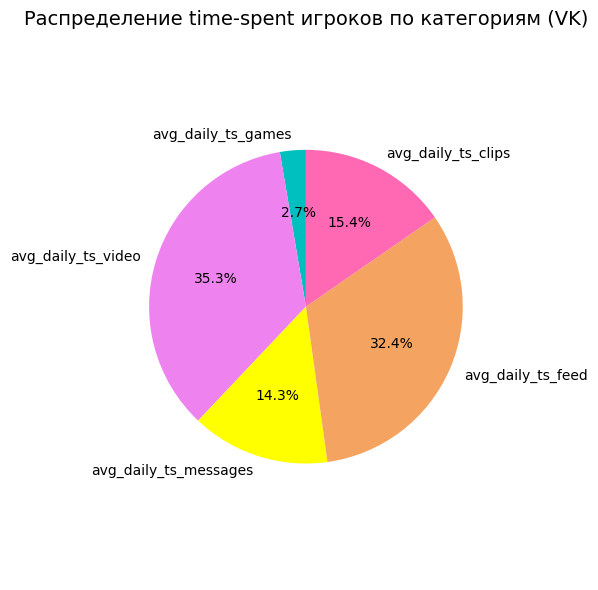

In [ ]:
df_players = df[df['days_in_games'].notna()]
daily_ts_columns = ['avg_daily_ts_games', 'avg_daily_ts_video', 'avg_daily_ts_messages', 'avg_daily_ts_feed', 'avg_daily_ts_clips']
daily_ts_sums_players = df_players[daily_ts_columns].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    daily_ts_sums_players,
    labels=daily_ts_sums_players.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['c', 'violet', 'yellow', 'sandybrown', 'hotpink']
)
plt.title('Распределение time-spent игроков по категориям (VK)', fontsize=14)
plt.axis('equal')
plt.show()

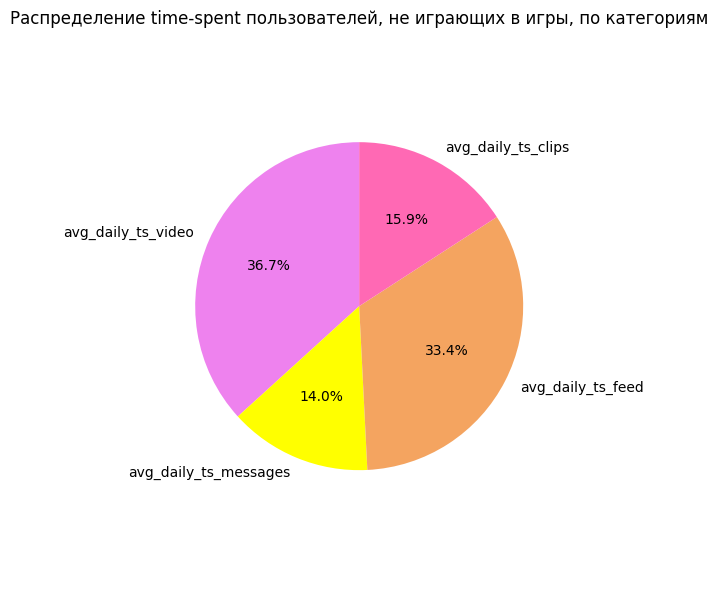

In [ ]:
df_non_players = df[df['days_in_games'].isna() | (df['days_in_games'] == 0)]
daily_ts_columns = ['avg_daily_ts_video', 'avg_daily_ts_messages', 'avg_daily_ts_feed', 'avg_daily_ts_clips']
daily_ts_sums_non_players = df_non_players[daily_ts_columns].sum()
plt.figure(figsize=(6, 6))
plt.pie(daily_ts_sums_non_players, labels=daily_ts_sums_non_players.index, autopct='%1.1f%%', startangle=90, colors=['violet','yellow','sandybrown', 'hotpink'])
plt.title('Распределение time-spent пользователей, не играющих в игры, по категориям')
plt.axis('equal')
plt.show()

## **Датасет ОК**

In [ ]:
df1 = read_database('ok.csv')
df1.head()

,age,sex,friends,heavy_ok_platform,ok_platforms_array,days_in_ok,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,...,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_ok,games
0,42.0,1,95.0,APP_IOS,[APP_IOS],1,24.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43.0,2,44.0,APP_ANDROID,[APP_ANDROID],3,124.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
2,35.0,2,48.0,APP_ANDROID,[APP_ANDROID],1,123.00,1.0,20.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60.0,1,52.0,APP_ANDROID,"[APP_ANDROID, MOBILE_WEB]",30,4563.79,30.0,1774.61,NaN,...,10.0,22.14,NaN,NaN,NaN,NaN,NaN,NaN,2.53,NaN
4,44.0,1,55.0,APP_ANDROID,[APP_ANDROID],2,513.53,2.0,75.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN


### **Матрица пропущенных значений (синий - пропущенные)**

<Axes: >

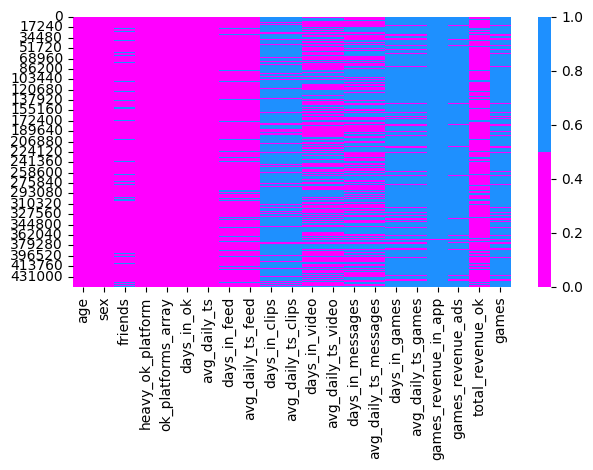

In [ ]:
cols = df1.columns[:30]
colours = ['#FF00FF', '#1E90FF']
sns.heatmap(df1[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
df2 = read_database2('ds2.csv', ';')
df2.head()

,code,tag
0,41984,UNTAGGED
1,58368,UNTAGGED
2,67072,UNTAGGED
3,76032,UNTAGGED
4,78336,GAMBLING


In [ ]:
import matplotlib.pyplot as plt

Построим распределение игр по категориям

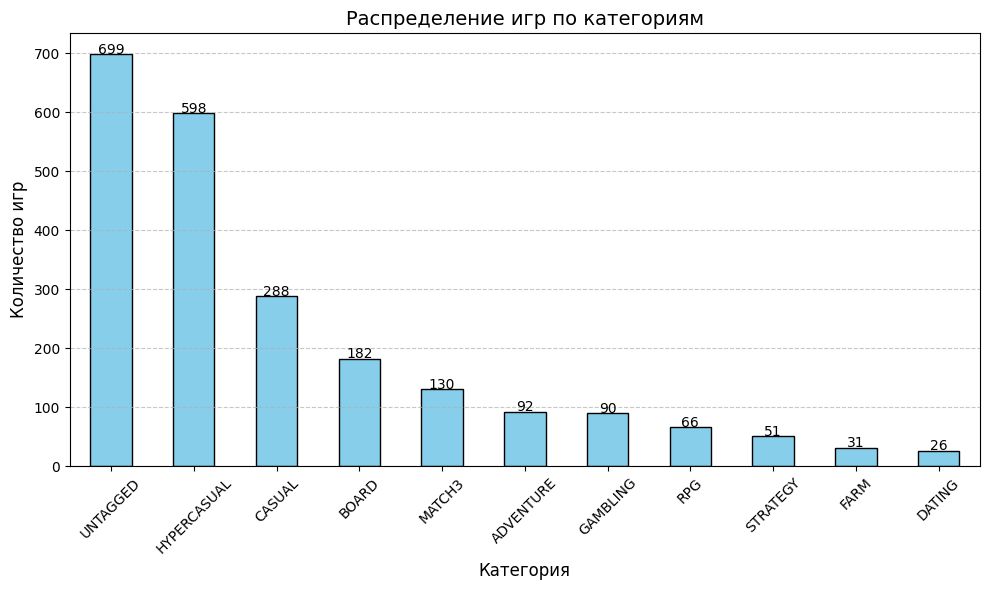

In [ ]:
category_cnt = df2['tag'].value_counts()

ax = category_cnt.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Распределение игр по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for i, count in enumerate(category_cnt):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




UNTAGGED – некоторые неразмченные с помощью категории данные. Попробуем посмотреть распределение без них

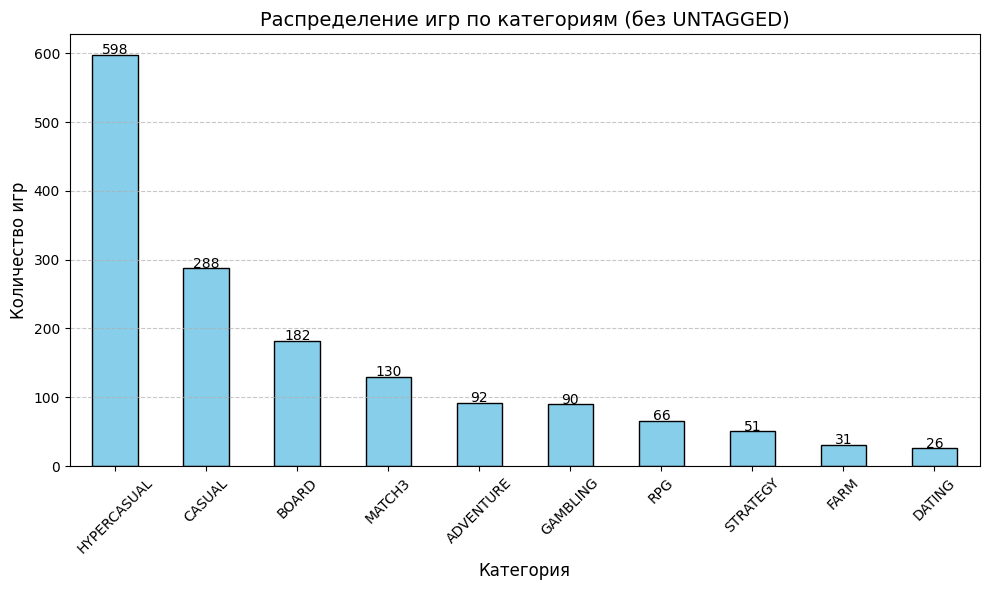

In [ ]:
filtered_df2 = df2[df2['tag'] != 'UNTAGGED']
category_cnt2 = filtered_df2['tag'].value_counts()

ax = category_cnt2.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Распределение игр по категориям (без UNTAGGED)', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for i, count in enumerate(category_cnt2):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Посмотрим на основной датасет

In [ ]:
df1.columns

Index(['age', 'sex', 'friends', 'heavy_ok_platform', 'ok_platforms_array',
       'days_in_ok', 'avg_daily_ts', 'days_in_feed', 'avg_daily_ts_feed',
       'days_in_clips', 'avg_daily_ts_clips', 'days_in_video',
       'avg_daily_ts_video', 'days_in_messages', 'avg_daily_ts_messages',
       'days_in_games', 'avg_daily_ts_games', 'games_revenue_in_app',
       'games_revenue_ads', 'total_revenue_ok', 'games'],
      dtype='object')

Рассмотрим распределения возрастов игроков

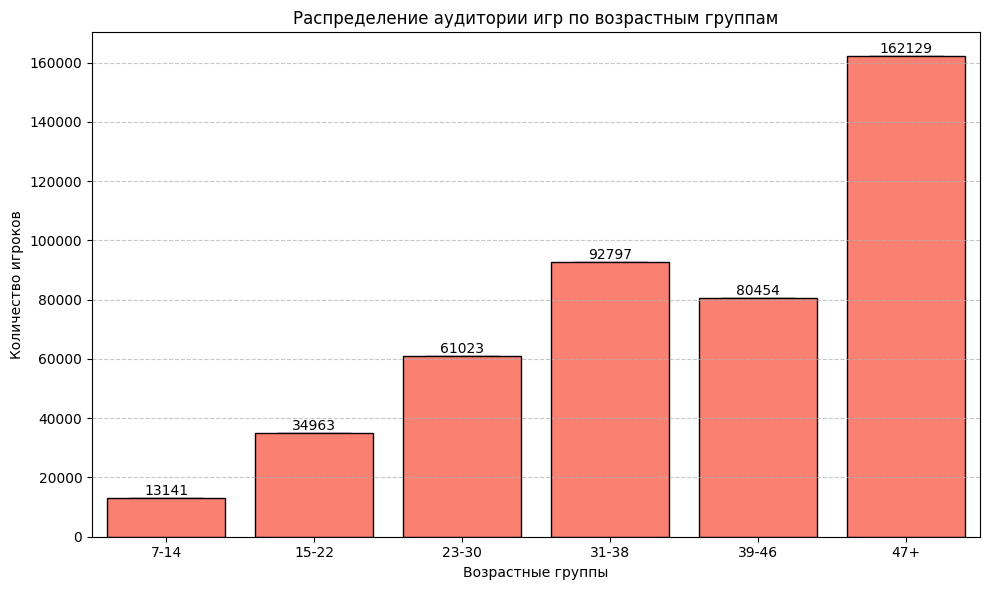

In [ ]:
bins = [7, 14, 22, 30, 38, 46, 100]
labels = ['7-14', '15-22', '23-30', '31-38', '39-46', '47+']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=True)
age_distribution = df1['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Распределение аудитории игр по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество игроков')
plt.xticks(rotation=0)
plt.bar_label(plt.bar(range(len(age_distribution)), age_distribution.values, color='salmon', edgecolor='black'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


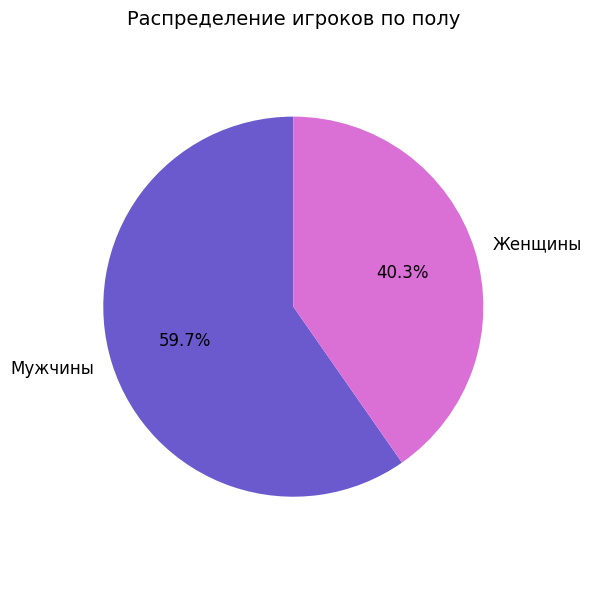

In [ ]:
gender_cnt = df1['sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_cnt,
    labels=['Мужчины', 'Женщины'],
    startangle=90,
    colors=['slateblue', 'orchid'],
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
plt.title('Распределение игроков по полу', fontsize=14)
plt.ylabel('')
plt.axis('equal')
plt.show()


<ipython-input-86-4102ae010972>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = df1.groupby(['age_group', 'sex']).size().unstack()


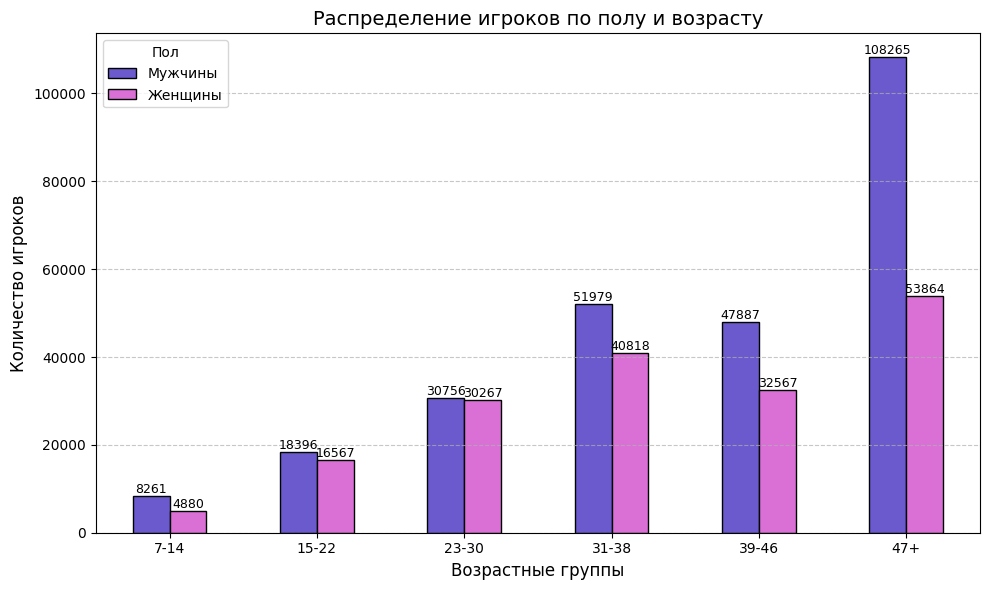

In [ ]:
age_gender = df1.groupby(['age_group', 'sex']).size().unstack()

ax = age_gender.plot(
    kind='bar',
    figsize=(10, 6),
    color=['slateblue', 'orchid'],
    edgecolor='black'
)

plt.title('Распределение игроков по полу и возрасту', fontsize=14)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(['Мужчины', 'Женщины'], title='Пол', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


Отлично, это распределение в целом по пользователям. Но нас интересуют именно игры. Посмотрим распределение именно по тем, кто играет, то есть если в days_in_games есть какие-то данные

<ipython-input-87-63b250a78119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['age_group'] = pd.cut(filtered_df1['age'], bins=bins, labels=labels, right=True)


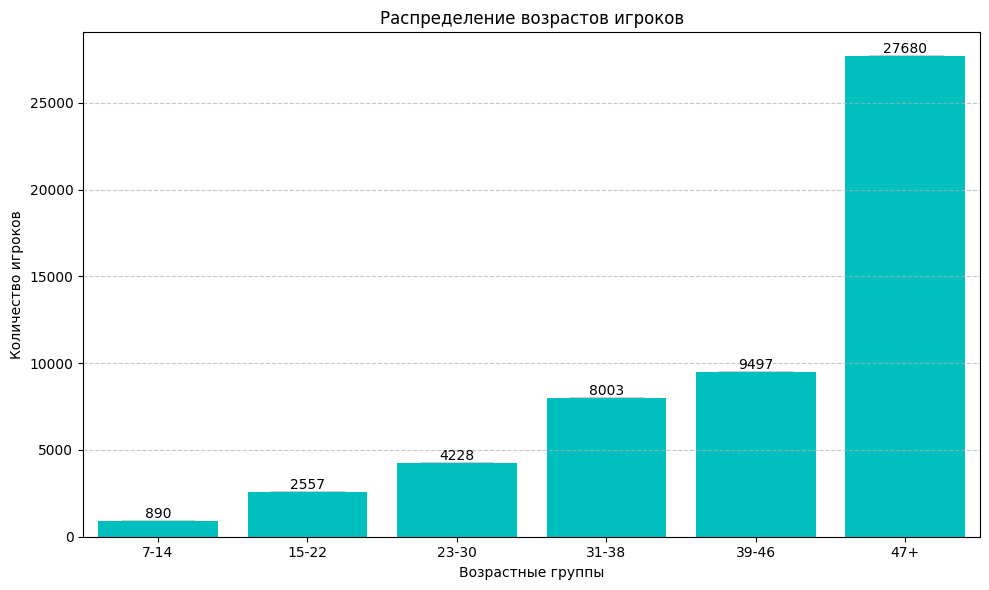

In [ ]:
filtered_df1 = df1[df1['days_in_games'].notna()]
filtered_df1['age_group'] = pd.cut(filtered_df1['age'], bins=bins, labels=labels, right=True)
age_distribution = filtered_df1['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='c', edgecolor='black')
plt.title('Распределение возрастов игроков')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество игроков')
plt.xticks(rotation=0)
plt.bar_label(plt.bar(range(len(age_distribution)), age_distribution.values, color='c'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

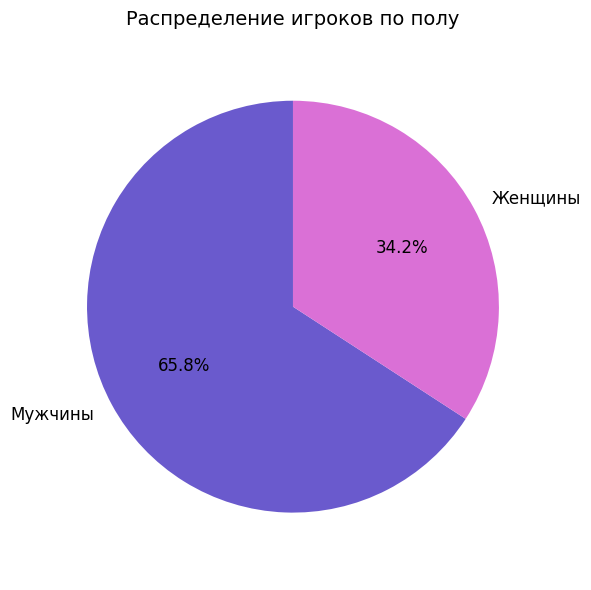

In [ ]:
gender_distribution = filtered_df1['sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_distribution,
    labels=['Мужчины', 'Женщины'],
    startangle=90,
    colors=['slateblue', 'orchid'],
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
plt.title('Распределение игроков по полу', fontsize=14)
plt.ylabel('')
plt.axis('equal')
plt.show()


<ipython-input-89-80fec964222f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution = filtered_df1.groupby(['age_group', 'sex']).size().unstack()


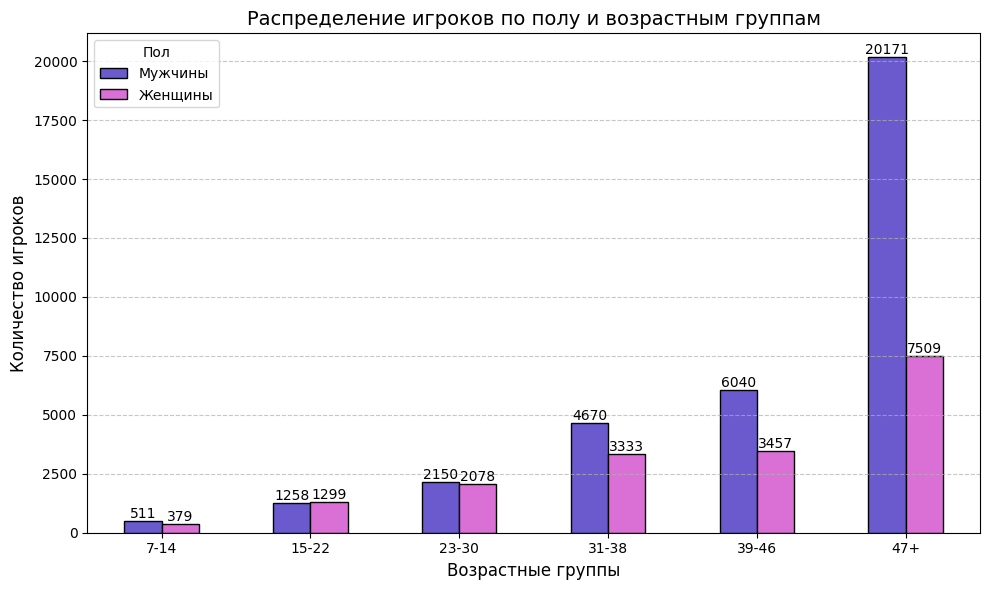

In [ ]:
age_gender_distribution = filtered_df1.groupby(['age_group', 'sex']).size().unstack()

ax = age_gender_distribution.plot(kind='bar', figsize=(10, 6), color=['slateblue', 'orchid'], edgecolor='black')

plt.title('Распределение игроков по полу и возрастным группам', fontsize=14)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(['Мужчины', 'Женщины'], title='Пол', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Видим явный перевес в категории 47+. На всякий случай и ее подробим

<ipython-input-90-f550aaf5b3ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['age_group'] = pd.cut(filtered_df1['age'], bins=bins1, labels=labels1, right=True)


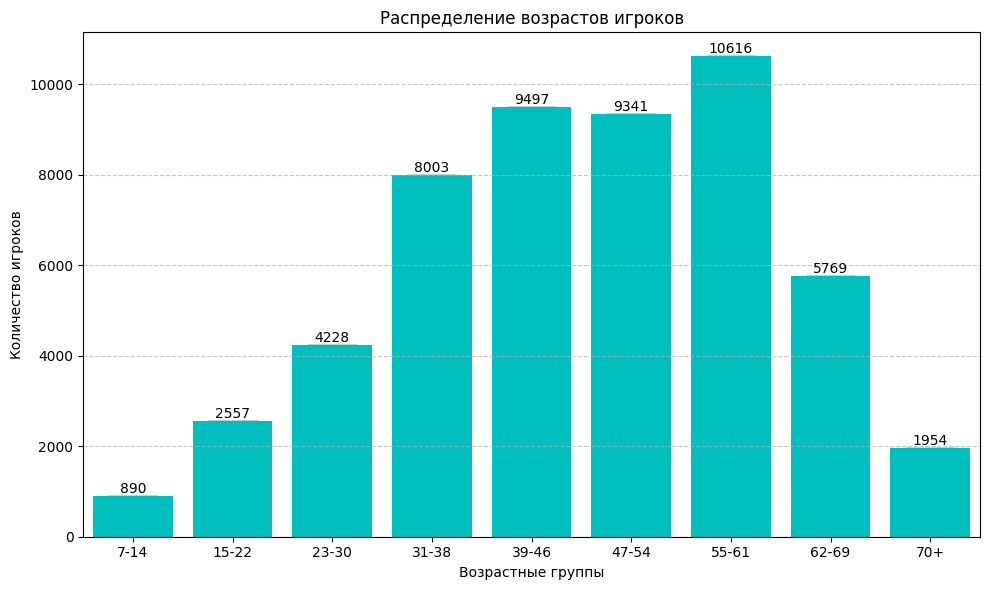

In [ ]:
bins1 = [7, 14, 22, 30, 38, 46, 54, 62, 70, 100]
labels1 = ['7-14', '15-22', '23-30', '31-38', '39-46', '47-54', '55-61', '62-69', '70+']
filtered_df1 = df1[df1['days_in_games'].notna()]
filtered_df1['age_group'] = pd.cut(filtered_df1['age'], bins=bins1, labels=labels1, right=True)
age_distribution = filtered_df1['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='c', edgecolor='black')
plt.title('Распределение возрастов игроков')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество игроков')
plt.xticks(rotation=0)
plt.bar_label(plt.bar(range(len(age_distribution)), age_distribution.values, color='c'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ничего себе!

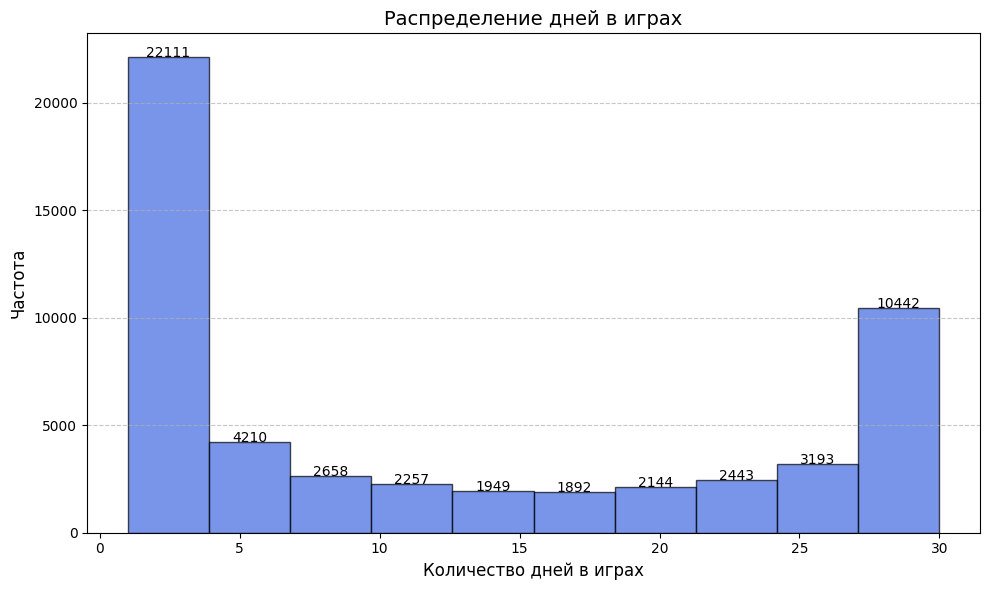

In [ ]:
df_filt = df1[df1['days_in_games'] > 0]

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    df_filt['days_in_games'],
    bins=10,
    edgecolor='black',
    color='royalblue',
    alpha=0.7
)

for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(
        patches[i].get_x() + patches[i].get_width() / 2,
        height + 0.5,
        str(int(height)),
        ha='center',
        fontsize=10
    )

plt.title('Распределение дней в играх', fontsize=14)
plt.xlabel('Количество дней в играх', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
print('медиана', df_filt['days_in_games'].median())
print('мода', df_filt['days_in_games'].mode())

медиана 7.0
мода 0    1.0
Name: days_in_games, dtype: float64


Теперь посмотрим, куда вообще пользователи тратят время

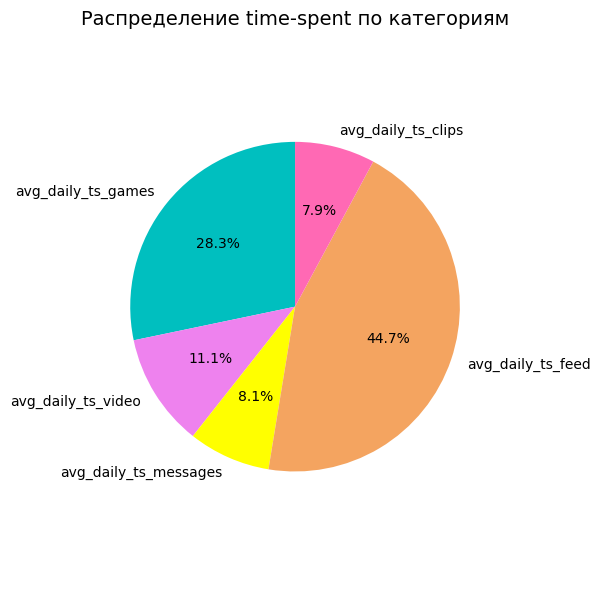

In [ ]:
daily_ts_columns = ['avg_daily_ts_games', 'avg_daily_ts_video', 'avg_daily_ts_messages', 'avg_daily_ts_feed', 'avg_daily_ts_clips']
daily_ts_sums = df1[daily_ts_columns].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    daily_ts_sums,
    labels=daily_ts_sums.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['c', 'violet', 'yellow', 'sandybrown', 'hotpink']
)
plt.title('Распределение time-spent по категориям', fontsize=14)
plt.axis('equal')
plt.show()



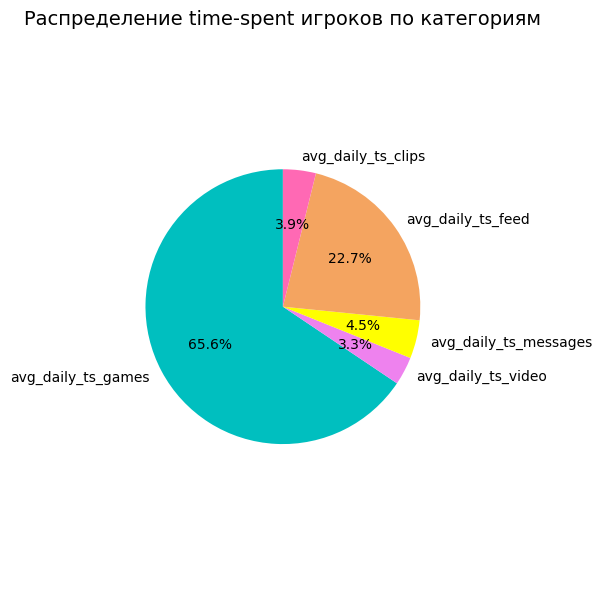

In [ ]:
df_players = df1[df1['days_in_games'].notna()]
daily_ts_columns = ['avg_daily_ts_games', 'avg_daily_ts_video', 'avg_daily_ts_messages', 'avg_daily_ts_feed', 'avg_daily_ts_clips']
daily_ts_sums_players = df_players[daily_ts_columns].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    daily_ts_sums_players,
    labels=daily_ts_sums_players.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['c', 'violet', 'yellow', 'sandybrown', 'hotpink']
)
plt.title('Распределение time-spent игроков по категориям', fontsize=14)
plt.axis('equal')
plt.show()


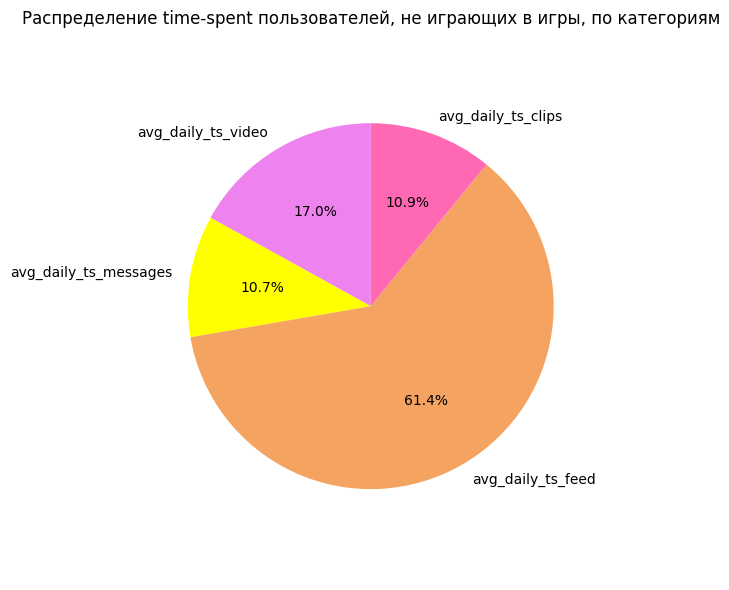

In [ ]:
df_non_players = df1[df1['days_in_games'].isna() | (df1['days_in_games'] == 0)]
daily_ts_columns = ['avg_daily_ts_video', 'avg_daily_ts_messages', 'avg_daily_ts_feed', 'avg_daily_ts_clips']
daily_ts_sums_non_players = df_non_players[daily_ts_columns].sum()
plt.figure(figsize=(6, 6))
plt.pie(daily_ts_sums_non_players, labels=daily_ts_sums_non_players.index, autopct='%1.1f%%', startangle=90, colors=['violet','yellow','sandybrown', 'hotpink'])
plt.title('Распределение time-spent пользователей, не играющих в игры, по категориям')
plt.axis('equal')
plt.show()


Посмотрим, с каких платформ пользователи пользуются ОК. Будем смотреть все устройства, с которых пользователи пользуются соцсетью

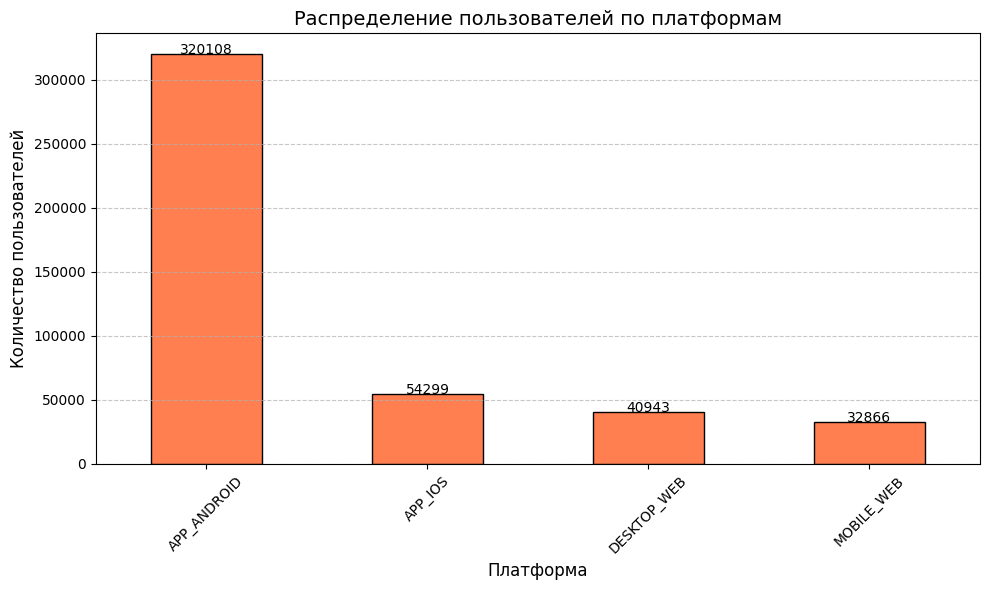

In [ ]:
heavy_platform_cnt = df1['heavy_ok_platform'].value_counts()

plt.figure(figsize=(10, 6))
ax = heavy_platform_cnt.plot(kind='bar', color='coral', edgecolor='black')

plt.title('Распределение пользователей по платформам', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for i, count in enumerate(heavy_platform_cnt):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


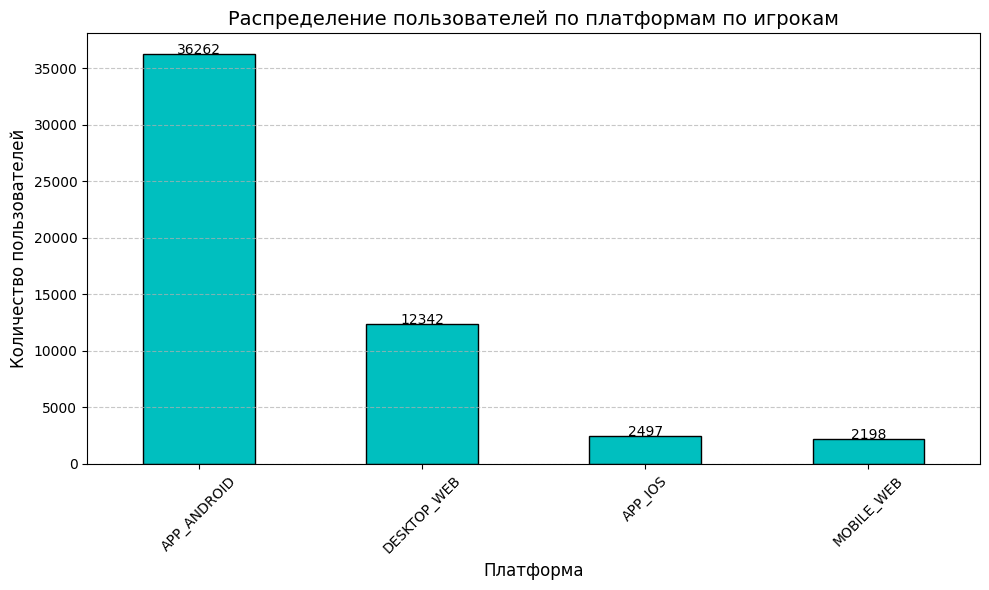

In [ ]:
filtered_df = df1[df1['days_in_games'].notna()]

heavy_platform_cnts = filtered_df['heavy_ok_platform'].value_counts()

plt.figure(figsize=(10, 6))
ax = heavy_platform_cnts.plot(kind='bar', color='c', edgecolor='black')

plt.title('Распределение пользователей по платформам по игрокам', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for i, count in enumerate(heavy_platform_cnts):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


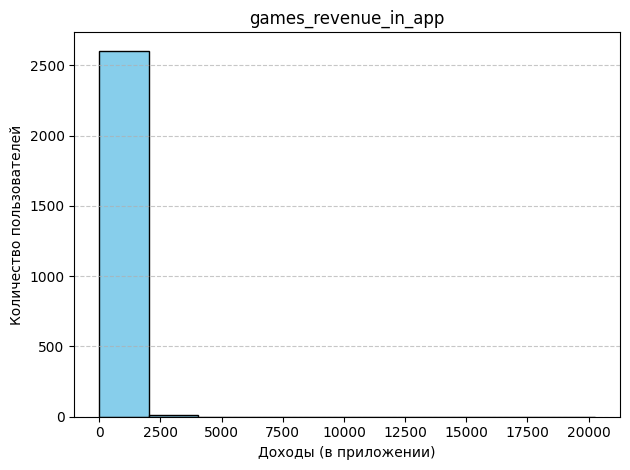

In [ ]:
plt.hist(df1['games_revenue_in_app'], bins=10, color='skyblue', edgecolor='black')
plt.title('games_revenue_in_app')
plt.xlabel('Доходы (в приложении)')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

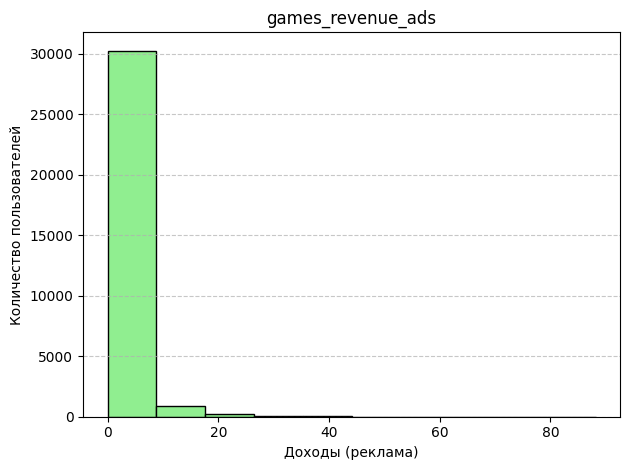

In [ ]:
plt.hist(df1['games_revenue_ads'], bins=10, color='lightgreen', edgecolor='black')
plt.title('games_revenue_ads')
plt.xlabel('Доходы (реклама)')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

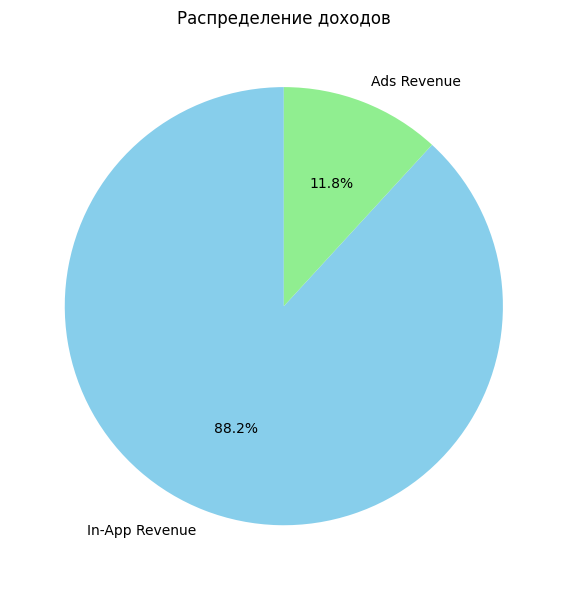

In [ ]:
total_in_app = df1['games_revenue_in_app'].sum()
total_ads = df1['games_revenue_ads'].sum()

plt.figure(figsize=(8, 6))
plt.pie(
    [total_in_app, total_ads],
    labels=['In-App Revenue', 'Ads Revenue'],
    colors=['skyblue', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Распределение доходов')
plt.show()